In [2]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')

In [3]:
alldata = pd.read_csv('alldata.csv')

In [4]:
alldata.head(10)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


In [5]:
# Null values

alldata['reviews'] = alldata['reviews'].fillna(0) #replace null values with 0.
alldata = alldata.dropna(axis=0, how = 'any') #remove rows with all null values


In [6]:
sum(alldata.isnull().any(axis=1)) # check if the removal of null's is successful

0

In [7]:
alldata.describe()

,reviews
count,6953.000000
mean,2435.183230
std,7515.618364
min,0.000000
25%,2.000000
50%,82.000000
75%,705.000000
max,148114.000000


In [8]:
alldata.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [9]:
alldata['position'].describe()

count               6953
unique              5242
top       Data Scientist
freq                 351
Name: position, dtype: object

In [10]:
alldata['description'].describe()

count                                                  6953
unique                                                 6708
top       Note: By applying to this position your applic...
freq                                                      9
Name: description, dtype: object

In [11]:
alldata['position'].value_counts()

Data Scientist                                        351
Senior Data Scientist                                  96
Research Analyst                                       64
Data Engineer                                          60
Machine Learning Engineer                              56
                                                     ... 
Stem Cell Scientist                                     1
Molecular Research and Development Scientist            1
Technical Program Manager, AR Platform                  1
Systems Assurance Reliability Engineer II (661099)      1
MTC Technical Architect - Data & AI                     1
Name: position, Length: 5242, dtype: int64

In [12]:
alldata['company'].value_counts()

Amazon.com                                      358
Ball Aerospace                                  187
Microsoft                                       137
Google                                          134
NYU Langone Health                               77
                                               ... 
Centene Corporation                               1
Le CultureClub                                    1
LearnVest                                         1
Level Education from Northeastern University      1
GeoVax, Inc.                                      1
Name: company, Length: 2213, dtype: int64

In [13]:
# From https://www.kaggle.com/ryanvu/data-science-job-market-eda-and-text-analysis

text = alldata.description.values

text

array(["Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to 

In [16]:
# Print out the first 5 examples of matches

limit = 0
for t in text:
    for sentance in t.split('\n'):
        if 'experience' in sentance:
            year = re.findall("\d{1,2}\+? year", sentance)
            if len(year)==1:
                print(year[0])
                print(sentance)
                print("*"*20)
                limit +=1
    if limit >= 5:
        break

8 year
Bachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work independently and make progress on several prospects/projects at the same time.Excellent English oral, written and presentation skillsStrong leadership and management skills, as well as the ability to forge strong interpersonal relationshipsAbility to travelExcellent computer skills including use of word processing, spreadsheet, database, presentation and prospect management software operating off a PC-based system including Salesforce.
********************
5+ year
5+ years experience, with varying datasets and experience with Computational Biology/Statistics/Physics, Mathematics, Computer Science, Algorithms/Incorporate Learning, etc.
********************
10+ year
10+ years of experience in Data Architecture in a professional services environment is highly preferred
**

In [17]:
# Compile the year value found into a list

experience_req = []
for t in text:
    for sentance in t.split('\n'):
        if 'experience' in sentance:
            year = re.findall("\d{1,2}\+? year", sentance)
            if len(year)==1:
                num = year[0].split(' ')
                experience_req.append(num[0])

In [19]:
# Remove the '+' sign after year value

for n,i in enumerate(experience_req):
    if "+" in i:
        experience_req[n] = re.sub(r'\+','',i)
experience_req = [int(item) for item in experience_req]

In [21]:
# Remove outliers

for n,i in enumerate(experience_req):
    if i >= 20:
        experience_req.pop(n)

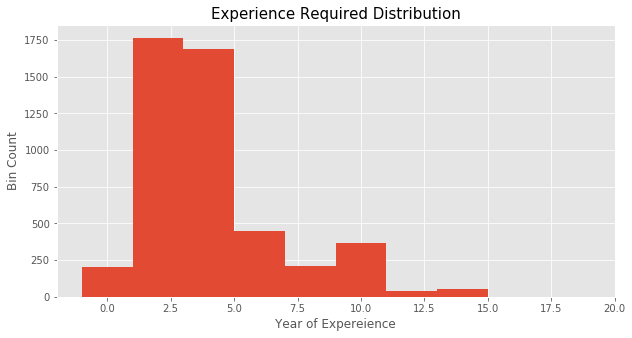

The average year of experience required is 4.66 years


In [22]:
plt.figure(figsize = (10,5))
plt.hist(experience_req,bins = list(range(0,21,2)), align = 'left')
plt.title('Experience Required Distribution', size = 15)
plt.ylabel('Bin Count')
plt.xlabel('Year of Expereience', size = 12)
plt.show()
print(f'The average year of experience required is {round(np.mean(experience_req),2)} years')

In [23]:
# Technical skills requirement

# Create a regex search function

def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [26]:
# Create a data frame with skills name and regex pattern to search with

skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

In [27]:
# Iterate through the list of skill using the search function created

i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,2187,0.31
1,Python,(?i)\WPython\W,2822,0.41
2,Hadoop,(?i)\WHadoop\W?,923,0.13
3,SQL,(?i)SQL\w*,1924,0.28
4,Tableau,(?i)\WTableau\W?,492,0.07
5,TensorFlow,(?i)\WTensorFlow\W?,406,0.06
6,Agile,(?i)\WAgile\W?,698,0.10
7,Power BI,(?i)\WPower\s?BI\W?,66,0.01
8,SSaS,(?i)\WSSAS\W?,9,0.00
9,Algorithm,(?i)\WAlgorithms?\W?,1703,0.24


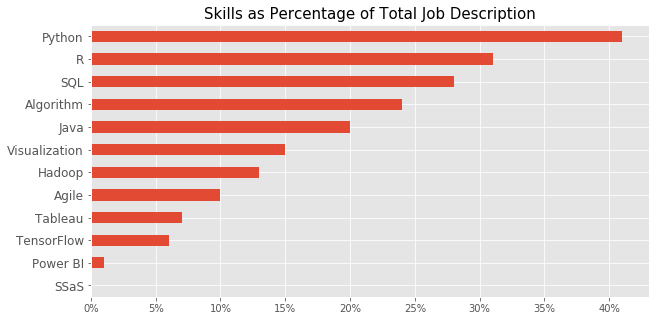

In [28]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

In [47]:
# Create a data frame with skills name and regex pattern to search with

skills = ['Communication','Teamwork','Research', 'Attention for detail', 'Problem solving', 'Independent', 'Presentation']

skill_patt = ['(?i)\WCommunication\W','(?i)\WTeamwork\W','(?i)\WResearch\W', '(?i)\WAttention for detail\W', '(?i)\WProblem solving\W', '(?i)\WIndependent\W', '(?i)\WPresentation\W']

skill_df = pd.DataFrame(
    {"skill": skills,
     "regex_pattern": skill_patt})

In [48]:
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df

,skill,regex_pattern,count,ptg
0,Communication,(?i)\WCommunication\W,3789,0.54
1,Teamwork,(?i)\WTeamwork\W,272,0.04
2,Research,(?i)\WResearch\W,3998,0.58
3,Attention for detail,(?i)\WAttention for detail\W,1,0.00
4,Problem solving,(?i)\WProblem solving\W,842,0.12
5,Independent,(?i)\WIndependent\W,613,0.09
6,Presentation,(?i)\WPresentation\W,938,0.13


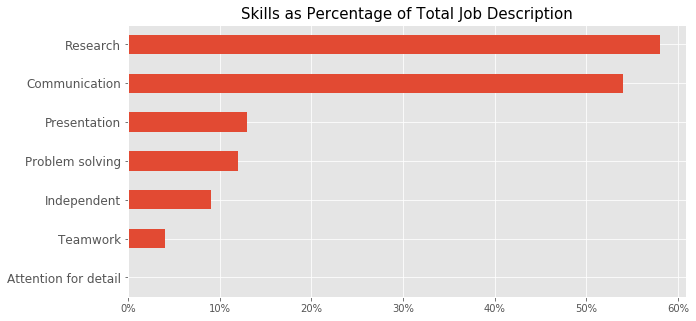

In [49]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

In [50]:
degree = ['Bachelor','Masters', 'PHD']

degree_patt = ['(?i)\WBachelor|BD|Bachelors degree\W','(?i)\WMaster|MD|Masters degree\W','(?i)\WPHD|Doctor\W']

degree_df = pd.DataFrame(
    {"degree": degree,
     "regex_pattern": degree_patt})

In [51]:
j = []
for x in degree_df['regex_pattern']:
    j.append(count_text(x,text))
degree_df['count'] = j
degree_df['ptg'] = round(degree_df['count']/len(text),2)
degree_df

,degree,regex_pattern,count,ptg
0,Bachelor,(?i)\WBachelor|BD|Bachelors degree\W,2189,0.31
1,Masters,(?i)\WMaster|MD|Masters degree\W,2248,0.32
2,PHD,(?i)\WPHD|Doctor\W,1724,0.25


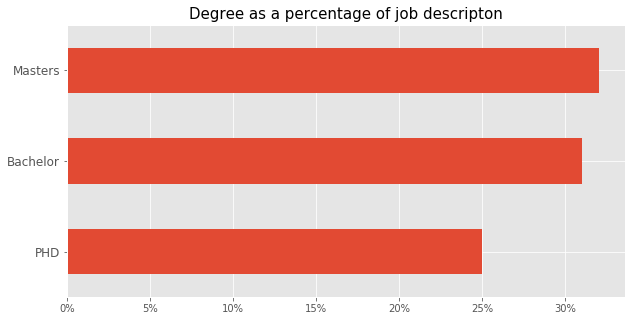

In [53]:
x = degree_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Degree as a percentage of job descripton', size = 15)
ax.set_yticklabels(x['degree'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()